In [1]:
import pandas as pd
import numpy as np
import sys
from google.colab import drive
drive.mount(f'/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


In [2]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping/tourister2.csv')

In [4]:
data['rating'] = data['rating'].apply(lambda x: x.split()[0].split('.')[0])

In [5]:
data['rating']

0       4
1       4
2       4
3       4
4       4
       ..
2398    5
2399    5
2400    1
2401    5
2402    4
Name: rating, Length: 2403, dtype: object

In [6]:
data = data.astype({'rating':'int64'})

In [7]:
data.head()

,review,rating
0,Good product in its price,4
1,Good product for gift,4
2,Good as we expected weight less..,4
3,Super,4
4,Best of best. 👍,4


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from imblearn.under_sampling import RandomUnderSampler
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[""''_]', '', text)
    text = re.sub('\n', '', text)
    return text

def decontract_text(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    return text

def final_clean(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    stop = set(stopwords.words('english'))
    filtered_words = [word for word in text.split() if word not in stop]
    ps = LancasterStemmer()
    text = [ps.stem(word) for word in filtered_words]
    text = ' '.join(text)
    return text

In [10]:
data['review'] = data['review'].apply(lambda text: decontract_text(text))
data['review'] = data['review'].apply(lambda text: clean(text))
data['review'] = data['review'].apply(lambda text: final_clean(text))

In [11]:
vec = CountVectorizer()
X = vec.fit_transform(data["review"])
X

<2403x2016 sparse matrix of type '<class 'numpy.int64'>'
	with 14355 stored elements in Compressed Sparse Row format>

In [12]:
df = pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out())

In [13]:
data['sentiment'] = data['rating'].apply(lambda x: 1 if x>3 else 0)

In [14]:
data['sentiment'].value_counts()

1    1746
0     657
Name: sentiment, dtype: int64

In [16]:
y = data['sentiment']

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df,y,test_size=0.3, stratify = y)

In [18]:
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(1682, 2016) (721, 2016)
(1682,) (721,)


In [19]:
clf = svm.SVC(class_weight = 'balanced')
clf.fit(Xtrain, ytrain)
trpred = clf.predict(Xtrain)
tpred = clf.predict(Xtest)

In [20]:
def conf_mat(actual, pred):
    classes = [0,1]
    cm = confusion_matrix(actual, pred, labels=classes)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion matrix")
    plt.show()

Training Accuracy 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       460
           1       0.97      0.99      0.98      1222

    accuracy                           0.97      1682
   macro avg       0.97      0.95      0.96      1682
weighted avg       0.97      0.97      0.97      1682



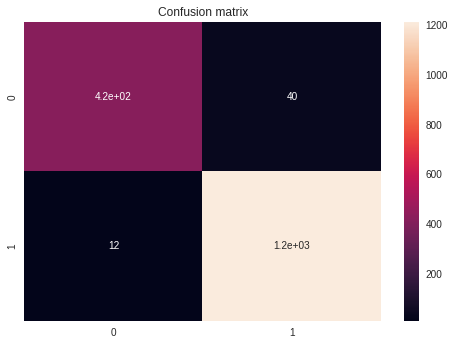

In [25]:
print(f'Training Accuracy \n{classification_report(ytrain, trpred)}')
conf_mat(ytrain, trpred)

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
trpred = dtc.predict(Xtrain)
tpred = dtc.predict(Xtest)

Training Accuracy 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       460
           1       0.97      0.99      0.98      1222

    accuracy                           0.97      1682
   macro avg       0.97      0.95      0.96      1682
weighted avg       0.97      0.97      0.97      1682



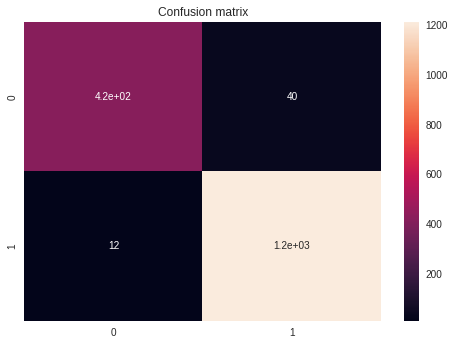

In [26]:
print(f'Training Accuracy \n{classification_report(ytrain, trpred)}')
conf_mat(ytrain, trpred)